In [2]:
# Created by David Zamora (david.zamoracisneros@mail.mcgill.ca)

# This script is intended to test and determine the best distribution function (PDF)
# disfit computes the residual sum of squares (RSS) to determine so.
# For more info, or to install the library, please refer to:
# https://erdogant.github.io/distfit/pages/html/index.html


# General imports
# and loading libraries
import numpy as np
import matplotlib.pyplot as plt
from distfit import distfit
import scipy.stats as st 

### Testing different PDF

From the [disfit documentation](https://erdogant.github.io/distfit/pages/html/index.html)

In [16]:
# Generating a normal distribution sample: mean 0, std dev of 3
data_2fit = np.random.normal(0,3,1000)

# Initialize disfit and test only for popular PDF
# Replace with 'full' to test the every PDF available in the library (it may be slow)
distr = distfit(distr='popular')

distr.fit_transform(data_2fit)

# Plot the PDF with the lowest RSS score
distr.plot()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00360124] [loc=-0.137 scale=3.057]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.162242] [loc=-11.364 scale=11.228]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.178336] [loc=-46.575 scale=35.210]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.00869852] [loc=-0.061 scale=2.634]
[distfit] >[t         ] [0.05 sec] [RSS: 0.00365603] [loc=-0.136 scale=3.034]
[distfit] >[genextreme] [0.12 sec] [RSS: 0.00403656] [loc=-1.261 scale=3.064]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.00363591] [loc=-250.935 scale=0.037]
[distfit] >[lognorm   ] [0.15 sec] [RSS: 0.00364694] [loc=-281.544 scale=281.396]
[distfit] >[beta      ] [0.05 sec] [RSS: 0.00357263] [loc=-86858.746 scale=87051.859]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.109007] [loc=-11.364 scale=21.231]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 0.00356534] [loc=-500.941 scale=77.487]
[distfit] >Compute confidence interval [parametric]


TypeError: 'DataFrame' object is not callable

### Fitting data to PDF

From the [scipy.stats documentation](https://docs.scipy.org/doc/scipy//reference/stats.html?highlight=scipy%20stats#module-scipy.stats)

In [17]:
# Returning estimates of shape, loc, and scale parameters from data.
# Default stimation method: Maximum Likelifood Estimation (MLE) 
# with Method of Moments (MM) also available.

x = st.norm.rvs(size=1000)

loc1, scale1 = st.norm.fit(x)

#norm.fit(data_2fit)
#print(f'kappa: {kappa}')
print(f'loc/mean: {loc1}')
print(f'scale/stn dev: {scale1}')

loc/mean: 0.04300431090408793
scale/stn dev: 1.024484882916303


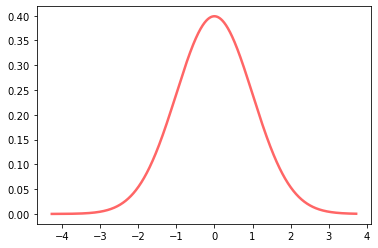

In [9]:
mean, var, skew, kurt = st.norm.stats(moments='mvsk')
a, b  = -2.32, 0.99
x = np.linspace(st.norm.ppf(1e-5), st.norm.ppf(0.9999), 1000)

fig, ax = plt.subplots(1,1)

ax.plot(x, st.norm.pdf(x), 'r-', lw=2.5, alpha=0.6)

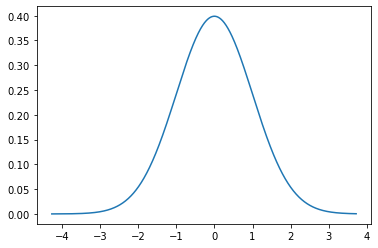

In [11]:
# Creating a freeze data plot
rv = st.norm()
plt.plot(x, rv.pdf(x))

loc: 9.147058110947627e-17
scale: 1.030693325907693


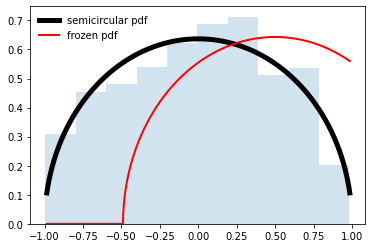

In [28]:
# For displaying the PDF
x = np.linspace(st.semicircular.ppf(0.001),
                st.semicircular.ppf(0.999), 1000)

# Freeze the distributioon for a fixed loc and scale.
rv = st.semicircular(loc=0.5, scale=0.99)

plt.figure()
plt.plot(x, st.semicircular.pdf(x), 'k-', lw=5, label='semicircular pdf')
plt.plot(x, rv.pdf(x), 'r-', lw=2, label='frozen pdf')
plt.hist(st.semicircular.rvs(size=len(x)),density=True,histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)

# For data fitting
loc1, scale1 = st.semicircular.fit(x)
print(f'loc: {loc1}')
print(f'scale: {scale1}')

The histrogram shows randomly generated values with a semicircular tendency, and the curves show the PDF expected behaviour.